<a href="https://colab.research.google.com/github/rushi2012/K_mean_Project/blob/main/Kmean_Clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/employee-compensation.csv')
df.head()


,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
df.shape

(72757, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72757 entries, 0 to 72756
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Organization Group Code  72757 non-null  int64  
 1   Job Family Code          72757 non-null  object 
 2   Job Code                 72757 non-null  object 
 3   Year Type                72757 non-null  object 
 4   Year                     72757 non-null  int64  
 5   Organization Group       72757 non-null  object 
 6   Department Code          72757 non-null  object 
 7   Department               72757 non-null  object 
 8   Union Code               72757 non-null  int64  
 9   Union                    72757 non-null  object 
 10  Job Family               72757 non-null  object 
 11  Job                      72757 non-null  object 
 12  Employee Identifier      72757 non-null  int64  
 13  Salaries                 72757 non-null  float64
 14  Overtime              

In [ ]:
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             1
Total Compensation         1
dtype: int64

In [ ]:
col_name=df.columns
for i in col_name:
    print(i,'has :',df[i].nunique(),"Unique values")

Organization Group Code has : 7 Unique values
Job Family Code has : 84 Unique values
Job Code has : 1073 Unique values
Year Type has : 1 Unique values
Year has : 2 Unique values
Organization Group has : 7 Unique values
Department Code has : 54 Unique values
Department has : 54 Unique values
Union Code has : 69 Unique values
Union has : 69 Unique values
Job Family has : 54 Unique values
Job has : 1079 Unique values
Employee Identifier has : 40969 Unique values
Salaries has : 53542 Unique values
Overtime has : 30784 Unique values
Other Salaries has : 41872 Unique values
Total Salary has : 67925 Unique values
Retirement has : 53151 Unique values
Health and Dental has : 23695 Unique values
Other Benefits has : 67759 Unique values
Total Benefits has : 70620 Unique values
Total Compensation has : 71485 Unique values


In [ ]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

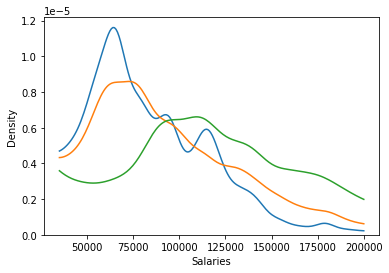

In [ ]:
salary = ['Salaries', 'Total Salary', 'Total Compensation']
for col in salary:
  ax_salary = sns.kdeplot(df[col], clip=(35000,200000))
  ax_salary

In [ ]:
df_num = df.drop(['Health and Dental', 'Overtime', 'Employee Identifier','Organization Group Code','Job', 'Job Code', 'Job Family','Job Family Code', 'Year Type','Year', 'Organization Group', 'Department Code', 'Department','Union Code', 'Union'], axis=1)


In [ ]:
df_num.describe()

,Salaries,Other Salaries,Total Salary,Retirement,Other Benefits,Total Benefits,Total Compensation
count,72757.000000,72757.000000,72757.000000,72757.000000,72757.000000,72757.000000,72757.000000
mean,65352.640830,4197.902107,74316.050298,13637.870116,4648.507836,27656.032114,101972.783148
std,43695.887082,8482.923583,51711.029638,9687.276056,3564.262428,16375.957554,66744.145098
min,-2596.000000,-7058.590000,-2596.000000,-30621.430000,-10636.500000,-21295.150000,-8965.960000
25%,28584.500000,0.000000,31273.800000,5159.110000,1733.530000,12592.970000,44521.420000
50%,64317.030000,905.870000,70724.740000,13819.760000,4418.980000,31272.180000,102309.690000
75%,94305.000000,5346.810000,106324.340000,20203.560000,6838.650000,39478.330000,145536.910000
max,319275.010000,342802.630000,471952.640000,68165.140000,32296.030000,101397.140000,510574.450000


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72757 entries, 0 to 72756
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salaries            72757 non-null  float64
 1   Other Salaries      72757 non-null  float64
 2   Total Salary        72757 non-null  float64
 3   Retirement          72757 non-null  float64
 4   Other Benefits      72757 non-null  float64
 5   Total Benefits      72757 non-null  float64
 6   Total Compensation  72757 non-null  float64
dtypes: float64(7)
memory usage: 3.9 MB


In [ ]:
df_num.isnull().sum()

Salaries              0
Other Salaries        0
Total Salary          0
Retirement            0
Other Benefits        0
Total Benefits        0
Total Compensation    0
dtype: int64

In [ ]:
df_num["Total Benefits"].fillna(df_num["Total Benefits"].mean(), inplace=True)
df_num["Total Compensation"].fillna(df_num["Total Compensation"].mean(), inplace=True)

In [ ]:
df_num.isnull().sum()

Salaries              0
Other Salaries        0
Total Salary          0
Retirement            0
Other Benefits        0
Total Benefits        0
Total Compensation    0
dtype: int64

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_num)
print(scaled)


[[0.18681599 0.0201754  0.12671125 ... 0.35332486 0.3997177  0.18140599]
 [0.1872629  0.0201754  0.12701438 ... 0.35850764 0.35464307 0.17103825]
 [0.20545165 0.0201754  0.13935122 ... 0.35728642 0.41903146 0.19751239]
 ...
 [0.0413675  0.02405051 0.03091517 ... 0.26952337 0.18937017 0.04423105]
 [0.02622184 0.02228872 0.01934348 ... 0.30150727 0.19522408 0.0350439 ]
 [0.06597152 0.03359518 0.05464009 ... 0.24935637 0.39897521 0.21353246]]


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans=KMeans(n_clusters=3)

In [ ]:
kmeans.fit(df_num)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[ 70036.14122722   3332.27560789  77307.85608314  15126.6574812
    5729.35685646  32702.25150641 110011.6411085 ]
 [ 16383.36142357    943.398754    17817.98698134   2638.07142617
    1462.64081872   7397.14148708  25215.12846842]
 [125098.15179591  10559.48800183 148146.70098014  26171.0272044
    6958.69246257  46057.84528628 194204.54626642]]


In [ ]:
y = kmeans.predict(df_num)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

In [ ]:
silhouette_score(df_num,y)

0.572471704500985

In [ ]:
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_num)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(df_num, labels, metric='euclidean'))

Text(0.5, 1.0, 'Silouette for K-means')

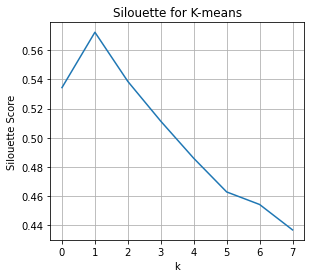

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")